### Example 7 - ROC-Curves

### 2.1 What to do?
We will create ROC curves using exemplary data from the TotalSegmentator training dataset. Load the data file (`ex7.csv`). For demonstration, define a binary ground truth (`TrueGroup`) as 1 if `kidney_right_volume_R2` is above its mean and 0 otherwise. Then, plot ROC curves for a continuous predictor against this ground truth.

Use `statsmed.ROC_fig(true_base, pred_value, positive_label, nsamples, label2, ax, title)` to generate the ROC curve with bootstrapped AUC confidence intervals.

If applied to your own data, ensure that the ground truth is truly binary and free of NaN values, and that the predictor is numeric.

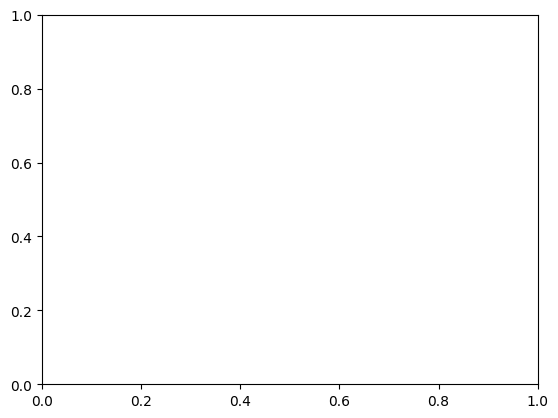

In [1]:
import pandas
import numpy as np
from statsmed import statsmed
import matplotlib.pyplot as plt
# Load example 7 data
data = pandas.read_csv('ex7.csv', delimiter=',', on_bad_lines='skip')

# Define a binary ground truth for demonstration
data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['kidney_right_volume_R2','kidney_left_volume_R1'])
data['TrueGroup'] = (data['kidney_right_volume_R2'] > np.mean(data['kidney_right_volume_R2'])).astype(int)


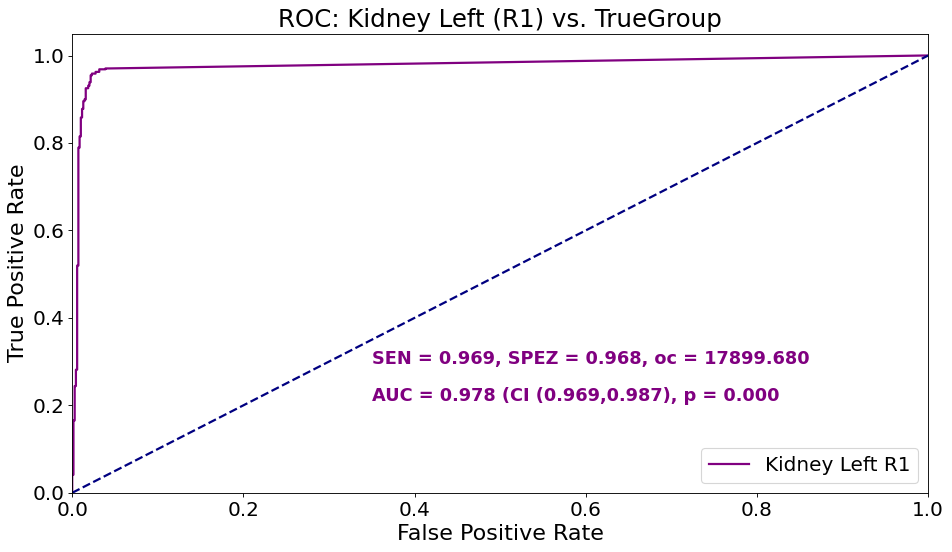

In [2]:


fig=plt.figure(figsize=(12, 7),dpi = 80)
fig.subplots_adjust(hspace = .3)
ax=fig.add_subplot(1,1,1)
# Example ROC: predictor is left kidney volume from reader 1
statsmed.ROC_fig(data['TrueGroup'].to_numpy(), data['kidney_left_volume_R1'].to_numpy(), 1, 1000, 'Kidney Left R1', ax, title='ROC: Kidney Left (R1) vs. TrueGroup')
plt.tight_layout()
plt.savefig('ROCurve.png', transparent=False)

The plot shows the ROC curve with the AUC (with 95% CI from bootstrapping), the operating point (oc) that maximizes Youden’s J (SEN + SPEZ − 1), and the diagonal reference.

You can repeat `statsmed.ROC_fig` with other predictors (e.g., `kidney_right_volume_R1`, `aorta_volume_R1`) or different labels to compare performance.

### 2.2 What to write?

In the statistical analysis section of a manuscript you may write:

"Receiver operating characteristic (ROC) analysis was performed. For each predictor, the area under the ROC curve (AUC) with 95% confidence interval was estimated using bootstrap resampling (n=1000). The optimal operating point was chosen by maximizing Youden’s J (sensitivity + specificity − 1)."

In the figure legends, where you used ROC curves, you may write:

"ROC curve showing the trade-off between sensitivity and specificity. The diagonal dashed line indicates chance level. Reported are AUC with 95% CI (bootstrap) and the operating point (oc) maximizing Youden’s J, along with its sensitivity (SEN) and specificity (SPEZ)."
